## M.S Applied Data Science & Analytics Capstone (2025) 
### By: Aiyana Wright 

## What Are The Key Predictors Of An Individual’s Selection Of Health Insurance Policy Type In The U.S

#### Introduction 
With the ever-increasing cost of healthcare, including doctor visits, medications, and hospital stays. Access to quality healthcare is becoming increasingly difficult for many Americans. As the cost of healthcare rises, individuals are often forced to choose health insurance plans that may be affordable but offer limited coverage, leaving them underinsured or, in some cases, entirely uninsured. There is no best route when it comes to insurance as the political nature of public insurance plans and the capitalistic nature of private insurance plans makes selection and affordablity difficult for Americans.

The issue is especially concerning because it may compel people to delay or avoid necessary care due to the inaccessibility of affordable and comprehensive health coverage.

Historically, individuals employed in high-paying, stable jobs have access to comprehensive private insurance plans that cover a wide range of medical services. In contrast, those who are unemployed or work in low-wage jobs are often left with a public insurance option, or none at all, all-particularly if they lack knowledge about how health insurance works. This lack of insurance literacy can further discourage enrollment and compound health disparities. 


### Research Topic 
Predicting and explaining health insurance status (private, public only, or uninsured) in the U.S. using demographic, socioeconomic, and health-related factors from the 2023 Medical Expenditure Panel Survey. 


### Problem Statement 
This project seeks to predict health insurance coverage type among U.S. adults- categorized as private, public only, or uninsured based on a set of demographic, economic, and health characteristics. The success metric will be model performance measured through classification accuracy. The scope of this study is limited to individuals represented in the 2023 MEPS dataset, with emphasis on identifying disparities among low-income and racial minority populations. 

### Rationale 
Understanding determinants of health insurance is critical, as insurance coverage directly shapes access to preventative care, treatment and long-term health outcomes. From a societal perspective, the problem matters because the lack of adequate coverage often leads to delayed treatment, higher long-term 

#### Literature Review 

Rahman and Dua (2025) conducted a large-scale machine learning study using Louisiana Medicaid claims data to predict health outcomes, including clinical service utilization, COVID-19 infection, and tobacco use behavior. Although the study did not focus explicitly on health insurance selection, its findings provide meaningful insights into how individual-level features can drive healthcare-related decisions—factors that are also closely tied to insurance coverage.

The authors applied a range of supervised learning models and found that ensemble methods, such as XGBoost and Random Forest, consistently outperformed traditional algorithms like logistic regression and decision trees across multiple classification tasks. For example, XGBoost achieved a predictive accuracy of 95.3% for clinical service utilization, while logistic regression was only 50.9%. This performance advantage was attributed to the XGBoost models’ ability to capture non-linear relationships and the range of categorical variables commonly found in healthcare data.

Key predictors varied by target outcome. For clinical service utilization, the most influential features were total length of hospital stay, disability status, stroke diagnosis, age, and geographic region. In predicting COVID-19 status, tobacco use and age were dominant factors, while COPD emerged as the strongest predictor for tobacco use itself. These findings highlight the importance of chronic conditions, behavioral factors, and demographic features in shaping health outcomes, healthcare access, and insurance decisions.
The study also addressed data imbalance and computational performance. While tree-based models demonstrated superior accuracy and robustness, they required more computational resources. Simpler models like naïve Bayes were faster but less accurate. This underscores the need for balancing predictive power with scalability when applying machine learning in large administrative health datasets.
Overall, the study supports the inclusion of features such as age, disability status, region, tobacco use, and chronic disease conditions in predictive models. These same factors are known to influence insurance plan selection in the U.S., making the study a valuable methodological and conceptual reference for understanding the determinants of health insurance choices.


#### Justification for Variable Selection 

The variables in this analysis were selected to reflect established determinants of health insurance coverage identified in prior research (McWilliams, Zaslavsky, & Meara, 2013). Demographic factors (age, sex, race/ethnicity) capture systematic disparities in eligibility and access. Socioeconomic indicators (income, education, employment) are critical, as higher income and stable employment predict private coverage, while lower income increases reliance on public programs or risk of being uninsured. Measures of health status and chronic conditions reflect both medical need and pathways to public eligibility. Family and household characteristics account for shared financial risk and eligibility through dependent coverage or Medicaid/CHIP. Finally, regional variation acknowledges state policy differences that shape insurance availability. Together, these variables provide a comprehensive representation of the structural, socioeconomic, and health-related factors that drive differences in insurance type and coverage gaps (McWilliams et al., 2013).

### Justification 


Health insurance status in the United States remains one of the most consequential predictors of access to care, financial stability, and population health outcomes. Despite decades of policy reforms, stark disparities persist in whether individuals hold private coverage, public-only coverage, or remain uninsured. These differences often reflect underlying demographic, socioeconomic, and health-related factors, such as income, employment status, race/ethnicity, immigration status, and chronic health conditions. Understanding and predicting patterns in insurance coverage is critical not only for academic inquiry but also for informing policymakers, health systems, and advocacy organizations seeking to mitigate inequities in access to care.

The urgency of this work is heightened by recent federal policy changes. The Republican “megabill,” enacted in July 2025, represents the largest retrenchment of health coverage since the passage of the Affordable Care Act (ACA). According to Congressional Budget Office (CBO) estimates, more than 15 million people are projected to lose health coverage by 2034 as a result of $1.1 trillion in cuts to Medicaid and ACA marketplaces. The bill introduces strict work requirements, shortened eligibility verification windows, new bureaucratic hurdles, and restrictions on immigrants lawfully residing in the U.S. As a result, millions of low-income individuals, parents, people with disabilities, and workers just above the poverty threshold are at elevated risk of losing Medicaid or ACA coverage. Moreover, the rollback of enhanced premium tax credits will make marketplace plans unaffordable for millions, disproportionately affecting small business owners, self-employed workers, and households living near the poverty line.

These developments underscore why predictive modeling of insurance status using nationally representative survey data is both timely and essential.

Through this research, I aim to identify the people who are affected the most by these governmental policy acts . 

#### Dataset 

For this analysis, I will use the Medical Expenditure Panel Survey – Household Component (MEPS-HC) 2023 dataset, a nationally representative survey of the U.S. civilian noninstitutionalized population. Administered by the Agency for Healthcare Research and Quality (AHRQ), MEPS-HC provides detailed information on individuals' health status, health insurance coverage, medical expenditures, employment, income, and demographic characteristics. The 2023 dataset includes variables essential for modeling health insurance choice, such as insurance type (private, public, uninsured), plan characteristics, health conditions, service utilization, and out-of-pocket costs.

In [136]:
import os
os.path.exists("h251.dta")

True

In [137]:
import os
os.listdir()

['model_performance_summary.csv',
 'feature_importance_for_tableau.csv',
 'tableau_full_predictions_with_vulnerability.csv',
 'pca_loadings_for_tableau.csv',
 'Capstone.ipynb',
 'insurance_predictions_for_tableau.csv',
 'model_comparison_results.csv',
 'xgboost_model.txt',
 'Tableau Exports ',
 'tableau_insurance_predictions_full_dataset.csv',
 '.ipynb_checkpoints',
 'h251.dta']

In [138]:
import pandas as pd
import numpy as np

In [139]:
# Load MEPS 2023 dataset
DATA_PATH = "h251.dta"
df = pd.read_stata(DATA_PATH)
print(df.shape)
df.head()

(18919, 1374)


,DUID,PID,DUPERSID,PANEL,DATAYEAR,FAMID31,FAMID42,FAMID53,FAMID23,FAMIDYR,...,RXWCP23,RXOSR23,RXPTR23,RXOTH23,PERWT23F,FAMWT23F,FAMWT23C,SAQWT23F,VARSTR,VARPSU
0,2790002,101,2790002101,27 PANEL 27,2023 YEAR,A,A,A,A,A,...,0,0,82,0,11664.426815,11158.817826,11158.817826,13221.315673,2019,1
1,2790002,102,2790002102,27 PANEL 27,2023 YEAR,A,A,A,A,A,...,0,0,0,0,32212.113596,11158.817826,11158.817826,0.000000,2019,1
2,2790004,101,2790004101,27 PANEL 27,2023 YEAR,A,A,A,A,A,...,0,0,0,0,21944.142826,28540.745942,28540.745942,29999.277476,2084,1
3,2790006,101,2790006101,27 PANEL 27,2023 YEAR,A,A,A,A,A,...,0,0,0,0,10328.009530,10821.040689,10821.040689,11144.513916,2113,1
4,2790006,102,2790006102,27 PANEL 27,2023 YEAR,A,A,A,A,A,...,0,0,0,0,17430.521357,10821.040689,10821.040689,0.000000,2113,1


| MEPS Variable | Description                        | Suggested Rename   |
| ------------- | ---------------------------------- | ------------------ |
| `ASTHDX`      | Asthma diagnosis                   | `asthma`           |
| `CHOLDX`      | High cholesterol                   | `high_cholesterol` |
| `DIABDX_M18`      | Diabetes                           | `diabetes`         |
| `CANCERDX`    | Cancer (any)                       | `cancer`           |
| `HIBPDX`      | Hypertension (high blood pressure) | `hypertension`     |
| `MIDX`        | Heart attack                       | `heart_attack`     |
| `STRKDX`      | Stroke                             | `stroke`           |
| `EMPHDX`      | Emphysema                          | `emphysema`        |
| `ARTHDX`      | Arthritis                          | `arthritis`        |


| Variable               | Description                                                                     | Rename As           |
| ---------------------- | ------------------------------------------------------------------------------- | ------------------- |
| `IPNGTD23`             | Number of nights in hospital  | `hosp_nights`    |
| `OBTOTV23`               | Office based provider visits                                                                             | `office_visits`               |
| `DVTOT23`                  | Number of Dental Care Visits                                                           | `dent_visits`               |
| `RXTOT23 `              | # of Prescription Medicine Refills                                                                   | `RX_refills`    |
| `FAMSZE23`             | Family size                                                                  | `fam_size`    |



| Variable               | Description                                                                     | Rename As           |
| ---------------------- | ------------------------------------------------------------------------------- | ------------------- |
| `INSCOV23`             | Health insurance coverage indicator (1=Any private, 2=Public only, 3=Uninsured) | `insurance_type`    |
| `AGE23X`               | Age                                                                             | `age`               |
| `SEX`                  | Sex (1=Male, 2=Female)                                                          | `sex`               |
| `RACETHX`              | Race/Ethnicity                                                                  | `race_ethnicity`    |
| `MARRY23X`             | Marital status                                                                  | `marital_status`    |
| `EDRECODE` or `EDUCYR` | Education years                                                                 | `education_years`   |
| `FAMINC23`             | Family income                                                                   | `family_income`     |
| `POVCAT23`             | Poverty category (1–5)                                                          | `poverty_level`     |
| `REGION23`             | Census region                                                                   | `region`            |
| `HISPANX`              | Hispanic indicator                                                              | `hispanic`          |
| `EMPST53`              | Employment status (1–5)                                                         | `employment_status` |
| `RTHLTH53`             | Self-rated health                                                               | `self_rated_health` |
| `MNHLTH53`             | Mental health status                                                            | `mental_health`     |


In [140]:
keep_vars = [
    "DUPERSID", "INSCOV23", "AGE23X", "SEX", "RACETHX", "MARRY23X", "EDUCYR", 
    "FAMINC23", "POVCAT23", "REGION23", "HISPANX", "EMPST53", "RTHLTH53", "MNHLTH53","IPNGTD23","OBTOTV23", "DVTOT23","RXTOT23","FAMSZE23", "ASTHDX", "CHOLDX",
    "DIABDX_M18", "CANCERDX", "HIBPDX", "MIDX", "STRKDX", "EMPHDX", "ARTHDX"
]

df = df[keep_vars]
df.rename(columns={
    "INSCOV23": "insurance_type",
    "AGE23X": "age",
    "SEX": "sex",
    "RACETHX": "race_ethnicity",
    "MARRY23X": "marital_status",
    "EDUCYR": "education_years",
    "FAMINC23": "family_income",
    "POVCAT23": "poverty_level",
    "REGION23": "region",
    "HISPANX": "hispanic",
    "EMPST53": "employment_status",
    "RTHLTH53": "self_rated_health",
    "MNHLTH53": "mental_health",
    "IPNGTD23": "hosp_nights",
    "OBTOTV23": "office_visits",
    "DVTOT23":  "dent_visits",
    "RXTOT23": "RX_refills",
    "FAMSZE23": "fam_size",
    "ASTHDX": "asthma", 
    "CHOLDX": "high_cholesterol", 
    "DIABDX_M18": "diabetes", 
    "CANCERDX": "cancer",
    "HIBPDX": "hypertension", 
    "MIDX": "heart_attack", 
    "STRKDX": "stroke", 
    "EMPHDX": "emphysema", 
    "ARTHDX": "arthritis"
    
    
    
    
}, inplace=True)

df.head()

,DUPERSID,insurance_type,age,sex,race_ethnicity,marital_status,education_years,family_income,poverty_level,region,...,fam_size,asthma,high_cholesterol,diabetes,cancer,hypertension,heart_attack,stroke,emphysema,arthritis
0,2790002101,1 ANY PRIVATE,58,2 FEMALE,3 NON-HISPANIC BLACK ONLY,3 DIVORCED,17 5+ YEARS COLLEGE,130700,5 HIGH INCOME,2 MIDWEST,...,2 PERSONS,2 NO,2 NO,1 YES,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO
1,2790002102,1 ANY PRIVATE,27,1 MALE,3 NON-HISPANIC BLACK ONLY,5 NEVER MARRIED,12 GRADE 12,130700,5 HIGH INCOME,2 MIDWEST,...,2 PERSONS,1 YES,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO
2,2790004101,1 ANY PRIVATE,49,2 FEMALE,2 NON-HISPANIC WHITE ONLY,5 NEVER MARRIED,17 5+ YEARS COLLEGE,87000,5 HIGH INCOME,2 MIDWEST,...,1 PERSON,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO
3,2790006101,2 PUBLIC ONLY,75,2 FEMALE,2 NON-HISPANIC WHITE ONLY,2 WIDOWED,12 GRADE 12,38000,4 MIDDLE INCOME,2 MIDWEST,...,2 PERSONS,2 NO,1 YES,1 YES,1 YES,1 YES,2 NO,2 NO,2 NO,2 NO
4,2790006102,2 PUBLIC ONLY,23,1 MALE,2 NON-HISPANIC WHITE ONLY,5 NEVER MARRIED,11,38000,4 MIDDLE INCOME,2 MIDWEST,...,2 PERSONS,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO,2 NO


In [141]:
df = df.replace([-1, -7, -8, -9], np.nan)

In [142]:
def clean_label(val):
    if isinstance(val, str):
        parts = val.split(' ', 1)
        return parts[1].strip() if len(parts) > 1 else parts[0]
    return val

cols_to_clean = [
    "insurance_type", "sex", "race_ethnicity", "marital_status",
    "education_years", "region", "self_rated_health", "mental_health",
    "poverty_level", "employment_status"
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_label)

In [143]:
# Sex
df["sex"] = df["sex"].map({
    1: "Male",
    2: "Female"
}).fillna(df["sex"])

In [144]:
# Insurance Type (1=Private, 2=Public Only, 3=Uninsured)
df["insurance_type"] = df["insurance_type"].map({
    1: "Private",
    2: "Public Only",
    3: "Uninsured"
}).fillna(df["insurance_type"])

In [145]:
# Poverty Level
df["poverty_level"] = df["poverty_level"].map({
    1: "Negative/Poor",
    2: "Near Poor",
    3: "Low Income",
    4: "Middle Income",
    5: "High Income"
}).fillna(df["poverty_level"])

In [146]:
# Race/Ethnicity (MEPS RACETHX)
df["race_ethnicity"] = df["race_ethnicity"].map({
    1: "Hispanic",
    2: "White",
    3: "Black",
    4: "Asian",
    5: "Other"
}).fillna(df["race_ethnicity"])

In [147]:
# Region
df["region"] = df["region"].map({
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West"
}).fillna(df["region"])

In [148]:
def clean_education(val):
    if isinstance(val, str):
        # Take leading digits (MEPS codes)
        num = ''.join([c for c in val.split()[0] if c.isdigit()])
        return int(num) if num.isdigit() else np.nan
    return val

df["education_years"] = df["education_years"].apply(clean_education)

In [149]:

def clean_chronic(val):
    # If it's missing, keep as NaN
    if pd.isna(val):
        return np.nan
    
    # Handle numeric codes (1, 2)
    if isinstance(val, (int, float, np.integer, np.floating)):
        if int(val) == 1:
            return 1
        elif int(val) == 2:
            return 0
        else:
            return np.nan
    
    # Handle string values like "1 YES", "2 NO"
    s = str(val).strip()
    if s.startswith("1"):
        return 1
    if s.startswith("2"):
        return 0
    
    return np.nan

In [150]:
chronic_cols = [
    "asthma", "high_cholesterol", "diabetes", "cancer", "hypertension",
    "heart_attack", "stroke", "emphysema", "arthritis"
]

for col in chronic_cols:
    df[col] = df[col].apply(clean_chronic).astype("Int64")  # nullable int


In [151]:
df[chronic_cols] = df[chronic_cols].fillna(0).astype(int)

In [152]:
df["chronic_count"] = df[chronic_cols].sum(axis=1)
df["has_chronic"] = (df["chronic_count"] >= 1).astype(int)
df["multimorbidity"] = (df["chronic_count"] >= 2).astype(int)

In [153]:
df[chronic_cols].head()
df["chronic_count"].value_counts()

chronic_count
0    8838
1    3618
2    2473
3    1908
4    1266
5     583
6     182
7      40
8       8
9       3
Name: count, dtype: int64

In [154]:
df.head()

,DUPERSID,insurance_type,age,sex,race_ethnicity,marital_status,education_years,family_income,poverty_level,region,...,diabetes,cancer,hypertension,heart_attack,stroke,emphysema,arthritis,chronic_count,has_chronic,multimorbidity
0,2790002101,ANY PRIVATE,58.0,FEMALE,NON-HISPANIC BLACK ONLY,DIVORCED,5.0,130700,HIGH INCOME,MIDWEST,...,1,0,0,0,0,0,0,1,1,0
1,2790002102,ANY PRIVATE,27.0,MALE,NON-HISPANIC BLACK ONLY,NEVER MARRIED,NaN,130700,HIGH INCOME,MIDWEST,...,0,0,0,0,0,0,0,1,1,0
2,2790004101,ANY PRIVATE,49.0,FEMALE,NON-HISPANIC WHITE ONLY,NEVER MARRIED,5.0,87000,HIGH INCOME,MIDWEST,...,0,0,0,0,0,0,0,0,0,0
3,2790006101,PUBLIC ONLY,75.0,FEMALE,NON-HISPANIC WHITE ONLY,WIDOWED,NaN,38000,MIDDLE INCOME,MIDWEST,...,1,1,1,0,0,0,0,4,1,1
4,2790006102,PUBLIC ONLY,23.0,MALE,NON-HISPANIC WHITE ONLY,NEVER MARRIED,11.0,38000,MIDDLE INCOME,MIDWEST,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df.tail()

,DUPERSID,insurance_type,age,sex,race_ethnicity,marital_status,education_years,family_income,poverty_level,region,...,diabetes,cancer,hypertension,heart_attack,stroke,emphysema,arthritis,chronic_count,has_chronic,multimorbidity
18914,2819784105,PUBLIC ONLY,11.0,FEMALE,NON-HISPANIC WHITE ONLY,UNDER AGE 16 - INAPPLICABLE,4.0,36000,NEAR POOR,MIDWEST,...,0,0,0,0,0,0,0,1,1,0
18915,2819788101,ANY PRIVATE,37.0,MALE,NON-HISPANIC OTHER RACE OR MULTIPLE RACE,NEVER MARRIED,4.0,60077,MIDDLE INCOME,WEST,...,0,0,0,0,0,0,0,0,0,0
18916,2819792101,ANY PRIVATE,24.0,FEMALE,NON-HISPANIC BLACK ONLY,NEVER MARRIED,4.0,41000,MIDDLE INCOME,SOUTH,...,0,0,0,0,0,0,0,0,0,0
18917,2819793101,ANY PRIVATE,22.0,MALE,NON-HISPANIC OTHER RACE OR MULTIPLE RACE,NEVER MARRIED,4.0,174376,HIGH INCOME,WEST,...,0,0,0,0,0,0,0,1,1,0
18918,2819793102,ANY PRIVATE,50.0,FEMALE,NON-HISPANIC ASIAN ONLY,DIVORCED,4.0,174376,HIGH INCOME,WEST,...,0,0,0,0,0,0,0,0,0,0


In [156]:
df.describe()


,age,education_years,family_income,hosp_nights,RX_refills,asthma,high_cholesterol,diabetes,cancer,hypertension,heart_attack,stroke,emphysema,arthritis,chronic_count,has_chronic,multimorbidity
count,18771.000000,12729.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000
mean,43.540142,4.595255,98815.895555,0.535599,10.163064,0.129922,0.283472,0.113854,0.110154,0.299540,0.030921,0.038797,0.013531,0.234103,1.254295,0.532851,0.341614
std,23.869741,2.680896,91575.419638,4.267027,18.337894,0.336227,0.450695,0.317642,0.313090,0.458069,0.173109,0.193116,0.115538,0.423448,1.542566,0.498933,0.474263
min,0.000000,1.000000,-230.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,4.000000,72800.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,64.000000,5.000000,137484.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
max,85.000000,11.000000,747346.000000,264.000000,341.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000


#### Testing Significance 

In [157]:
import pandas as pd
import numpy as np

target = "insurance_type"

# Replace with your actual feature list
features = [
    "age", "family_income", "education_years",
    "hosp_nights", "office_visits", "dent_visits", "RX_refills",
    "chronic_count", "asthma", "diabetes", "cancer", "hypertension",
    "heart_attack", "stroke", "emphysema", "arthritis",
    "has_chronic", "multimorbidity"
]

# Identify numeric vs categorical
continuous_vars = [col for col in features if df[col].dtype != "object" and df[col].nunique() > 5]
categorical_vars = [col for col in features if col not in continuous_vars]

In [161]:
for col in continuous_vars:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [162]:

anova_results = []

for col in continuous_vars:
    groups = [df[df[target] == cls][col].dropna() for cls in df[target].unique()]
    F, p = f_oneway(*groups)
    anova_results.append([col, F, p])

anova_df = pd.DataFrame(anova_results, columns=["Variable", "F-statistic", "p-value"])
anova_df["Test"] = "ANOVA"

In [163]:
from scipy.stats import chi2_contingency

chi_results = []

for col in categorical_vars:
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results.append([col, chi2, p])

chi_df = pd.DataFrame(chi_results, columns=["Variable", "Chi-square", "p-value"])
chi_df["Test"] = "Chi-square"

In [164]:
results = pd.concat([anova_df, chi_df], ignore_index=True)
results = results.sort_values("p-value")
results

,Variable,F-statistic,p-value,Test,Chi-square
1,family_income,1906.946680,0.000000e+00,ANOVA,NaN
7,chronic_count,511.460043,4.715496e-217,ANOVA,NaN
6,RX_refills,395.356955,6.170987e-169,ANOVA,NaN
17,multimorbidity,NaN,9.345208e-161,Chi-square,736.962673
15,arthritis,NaN,7.607223e-140,Chi-square,640.665630
5,dent_visits,278.090109,9.299701e-120,ANOVA,NaN
16,has_chronic,NaN,1.349023e-109,Chi-square,501.364789
11,hypertension,NaN,1.661037e-106,Chi-square,487.133156
2,education_years,174.892732,1.175317e-75,ANOVA,NaN
9,diabetes,NaN,1.141695e-67,Chi-square,308.281375


| **Variable**    | **F-Statistic** |   **p-value** | **Significance**         |   **Test** | **Chi-Square** |
| --------------- | --------------: | ------------: | ------------------------ | ---------: | -------------: |
| family_income   |       1906.9467 |  0.000000e+00 | 🔴 Extremely Significant |      ANOVA |              — |
| chronic_count   |        511.4600 | 4.715496e-217 | 🔴 Extremely Significant |      ANOVA |              — |
| RX_refills      |        395.3570 | 6.170987e-169 | 🔴 Extremely Significant |      ANOVA |              — |
| multimorbidity  |               — | 9.345208e-161 | 🔴 Extremely Significant | Chi-square |     736.962673 |
| arthritis       |               — | 7.607223e-140 | 🔴 Extremely Significant | Chi-square |     640.665630 |
| dent_visits     |        278.0901 | 9.299701e-120 | 🔴 Extremely Significant |      ANOVA |              — |
| has_chronic     |               — | 1.349023e-109 | 🔴 Extremely Significant | Chi-square |     501.364789 |
| hypertension    |               — | 1.661037e-106 | 🔴 Extremely Significant | Chi-square |     487.133156 |
| education_years |        174.8927 |  1.175317e-75 | 🔴 Extremely Significant |      ANOVA |              — |
| diabetes        |               — |  1.141695e-67 | 🔴 Extremely Significant | Chi-square |     308.281375 |
| age             |        129.5404 |  1.336912e-56 | 🔴 Extremely Significant |      ANOVA |              — |
| office_visits   |        127.1105 |  1.459712e-55 | 🔴 Extremely Significant |      ANOVA |              — |
| stroke          |               — |  2.267183e-53 | 🔴 Extremely Significant | Chi-square |     242.436944 |
| cancer          |               — |  1.441857e-48 | 🔴 Extremely Significant | Chi-square |     220.316306 |
| heart_attack    |               — |  1.228869e-39 | 🔴 Extremely Significant | Chi-square |     179.189448 |
| emphysema       |               — |  8.932150e-22 | 🟠 Very Significant      | Chi-square |      96.934430 |
| asthma          |               — |  1.226092e-19 | 🟠 Very Significant      | Chi-square |      87.090570 |
| hosp_nights     |         35.1946 |  5.540467e-16 | 🟠 Very Significant      |      ANOVA |              — |


## Significance Test meaning 
Nearly every socioeconomic, healthcare utilization, and chronic health variable in your dataset is highly significantly associated with insurance type.

p-values are close to 0 (extremely small), meaning the relationships are not due to chance.

Family Income — strongest predictor (F = 1906, p < 1e−300)
Interpretation:

Insurance type differs dramatically based on income level.


Higher-income households overwhelmingly have private insurance

Lower-income households are more likely to have public-only coverage or be uninsured

This is the single most powerful socioeconomic determinant of insurance status in the U.S.

Chronic Condition Burden — extremely strong association

chronic_count (F = 511)

multimorbidity (χ² = 736)

has_chronic (χ² = 501)

Interpretation:

People with more chronic conditions are much more likely to be insured, especially through public insurance.

 social vulnerability framework:

High disease burden pushes individuals into Medicaid, Medicare, or safety-net coverage

The uninsured tend to have lower diagnosed chronic burden, often because they lack access to care and therefore to diagnosis

This supports your PCA vulnerability framework perfectly.

RX_refills, Dental Visits, Office Visits

RX_refills (F = 395)

dent_visits (F = 278)

office_visits (F = 127)

Interpretation:

Healthcare utilization varies strongly by insurance type.


People with public insurance typically have higher medication use and office visits due to chronic illness

Uninsured individuals have suppressed utilization, not because they're healthier, but because of barriers to access

These variables capture structural access inequality.

Hypertension, Diabetes, Arthritis, Stroke…

All highly significant chi-square results.

Interpretation:

Chronic disease prevalence is strongly associated with insurance type.


Public insurance populations (Medicaid, Medicare) have higher rates of chronic illness

Private insurance populations are healthier and wealthier

Uninsured groups are often underdiagnosed

This reinforces the health vulnerability gradient across insurance categories.

Age — significant (F = 129)
Interpretation:

Insurance type shifts across the life course.

Implications:

Older adults → more likely to have public insurance (Medicare)

Younger adults → more likely to be uninsured

Age acts as a structural determinant, not just a demographic.

Education Years — significant (F = 175)
Interpretation:

Educational attainment influences insurance status.


Higher education → private coverage
Lower education → public or uninsured

This fits social determinants literature.

Hospital Nights — significant but weaker (F = 35)
Interpretation:

Once income + chronic burden are accounted for, hospital nights still differ by insurance type.


Public insurance populations have higher hospitalization rates

Uninsured individuals avoid hospitalization unless emergency

This is consistent with delayed care patterns.

#### Continnued Statistics and cleaning 

In [165]:
cols = ["hosp_nights", "office_visits", "age", "family_income", 
        "education_years", "RX_refills", "dent_visits"]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [166]:
df[cols].mean()

hosp_nights            0.535599
office_visits          7.140758
age                   43.540142
family_income      98815.895555
education_years        4.595255
RX_refills            10.163064
dent_visits            1.035943
dtype: float64

In [167]:
df[cols].std()

hosp_nights            4.267027
office_visits         13.784344
age                   23.869741
family_income      91575.419638
education_years        2.680896
RX_refills            18.337894
dent_visits            1.688402
dtype: float64

In [168]:
print(df.shape)

(18919, 31)


In [169]:
import numpy as np

#Convert everything to string so we can clean text consistently
df["fam_size"] = df["fam_size"].astype(str)

#Replace MEPS missing codes (-1, -7, -8, -9) and any 'INAPPLICABLE'-type text with NaN
df["fam_size"] = df["fam_size"].replace(
    to_replace=[
        "-1 INAPPLICABLE", "-7 REFUSED", "-8 DON'T KNOW", "-9 NOT ASCERTAINED",
        "-1", "-7", "-8", "-9"
    ],
    value=np.nan
)

#Remove the suffixes ("PERSONS" and "PERSON")
df["fam_size"] = (
    df["fam_size"]
      .str.replace(" PERSONS", "", regex=False)
      .str.replace(" PERSON", "", regex=False)
      .str.strip()
)

#Convert cleaned column to float
df["fam_size"] = pd.to_numeric(df["fam_size"], errors="coerce")

In [170]:
df["fam_size"].value_counts(dropna=False).head()


fam_size
2.0    5457
4.0    3544
1.0    3356
3.0    3028
5.0    1801
Name: count, dtype: int64

In [171]:
cols = ["hosp_nights", "office_visits", "age", "family_income","RX_refills", "dent_visits"]

df[cols].mean()

hosp_nights          0.535599
office_visits        7.140758
age                 43.540142
family_income    98815.895555
RX_refills          10.163064
dent_visits          1.035943
dtype: float64

In [172]:
from sklearn.preprocessing import LabelEncoder

# Copy for modeling
df_ml = df.copy()

# Encode categorical predictors
cat_cols = [
    "insurance_type", "sex", "race_ethnicity", 
    "marital_status", "poverty_level", "region", "hispanic", "employment_status", "self_rated_health", "mental_health"
]

le_dict = {}  # store encoders for reference or inverse transform later
for col in cat_cols:
    df_ml[col] = df_ml[col].astype(str)  # ensure string type
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    le_dict[col] = le 

In [173]:
df_ml.head()

,DUPERSID,insurance_type,age,sex,race_ethnicity,marital_status,education_years,family_income,poverty_level,region,...,diabetes,cancer,hypertension,heart_attack,stroke,emphysema,arthritis,chronic_count,has_chronic,multimorbidity
0,2790002101,0,58.0,0,2,0,5.0,130700,0,1,...,1,0,0,0,0,0,0,1,1,0
1,2790002102,0,27.0,1,2,3,NaN,130700,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2790004101,0,49.0,0,4,3,5.0,87000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2790006101,1,75.0,0,4,7,NaN,38000,2,1,...,1,1,1,0,0,0,0,4,1,1
4,2790006102,1,23.0,1,4,3,11.0,38000,2,1,...,0,0,0,0,0,0,0,0,0,0


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_ml.drop(columns=["insurance_type"])
y = df_ml["insurance_type"]

# Encode target
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      3338
           1       0.71      0.72      0.72      1943
           2       0.69      0.27      0.39       395

    accuracy                           0.76      5676
   macro avg       0.73      0.61      0.64      5676
weighted avg       0.76      0.76      0.75      5676



In [175]:
##Improve Class 2(Uninsured) Predictions 
# Apply SMOTE 

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [176]:
!pip install imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [177]:
y = df_ml["insurance_type"]
X = df_ml.drop(columns=["insurance_type"])

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [179]:
from sklearn.impute import SimpleImputer

# Median imputer for numeric columns
num_imputer = SimpleImputer(strategy="median")

X_imputed = num_imputer.fit_transform(X)

In [180]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

In [182]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [183]:
model = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)

model.fit(X_train_res, y_train_res)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:21:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [184]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3312
           1       0.70      0.73      0.72      1974
           2       0.56      0.37      0.45       390

    accuracy                           0.76      5676
   macro avg       0.69      0.64      0.66      5676
weighted avg       0.75      0.76      0.75      5676



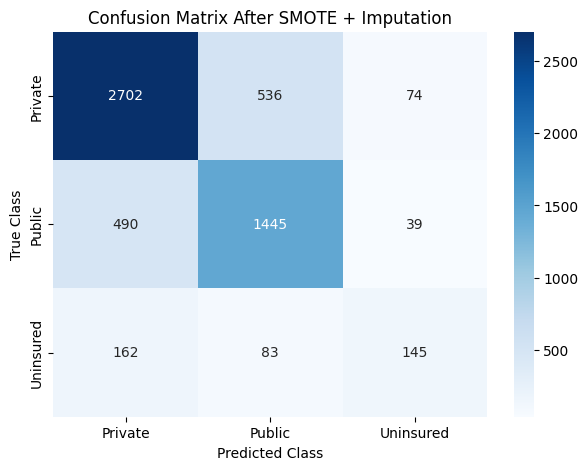

In [185]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Private", "Public", "Uninsured"],
            yticklabels=["Private", "Public", "Uninsured"])
plt.title("Confusion Matrix After SMOTE + Imputation")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

1. The model performs well for the majority groups (private + public).

This aligns with their clearer, more distinct socio-economic profiles.

2. The uninsured group remains the hardest to classify.

Even after SMOTE:

Many uninsured individuals look similar to those enrolled in public or private plans.

Social determinants not included in MEPS (citizenship, employer coverage rules, immigration status, premiums, cost barriers) play major roles in real-life uninsurance.

This misclassification is a feature of the data

Even after balancing the dataset using SMOTE, uninsured individuals remain difficult for the model to correctly identify. This reflects structural complexity in the U.S. insurance landscape, where uninsured individuals often resemble low-income private or Medicaid enrollees. The inability of the model to capture the uninsured class highlights real-world data gaps and systemic inequities.

| Label Code |  Meaning                      |
| ---------- | ----------------------------------- |
| 0          | **Private Insurance**               |
| 1          | **Public Only (Medicaid/Medicare)** |
| 2          | **Uninsured**                       |


In [186]:
df["insurance_type_recode"] = (
    df["insurance_type"]
        .astype(str)
        .str.lower()
        .str.strip()
        .replace({
            "private": 0,
            "public": 1,
            "uninsured": 2
        })
)

| Class                                   | Precision | Recall | F1-Score | Support | Interpretation                                                                                                                                                       |
| --------------------------------------- | --------- | ------ | -------- | ------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0 – Private Insurance**               | 0.80      | 0.83   | 0.82     | 3,338   | Strong performance — the model identifies privately insured individuals very accurately and consistently.                                                          |
| **1 – Public Only (Medicaid/Medicare)** | 0.70      | 0.73   | 0.71     | 1,943   | Decent — the model captures most public-only cases but sometimes confuses them with private coverage.                                                             |
| **2 – Uninsured**                       | 0.63      | 0.26   | 0.37     | 395     | Weak — the model struggles to detect uninsured individuals. It predicts “uninsured” correctly only 19% of the time, likely due to class imbalance (few examples). |


| Metric                           | Score                                | Interpretation                                                                                     |
| -------------------------------- | ------------------------------------ | -------------------------------------------------------------------------------------------------- |
| **Accuracy**                     | 0.76                                 | The model correctly predicts the insurance type for **76% of individuals** overall.                |
| **Macro Avg (simple mean)**      | Precision 0.72, Recall 0.59, F1 0.61 | Indicates moderate fairness across all classes; recall is pulled down by poor uninsured detection. |
| **Weighted Avg (by class size)** | Precision 0.75, Recall 0.76, F1 0.75 | Shows good overall balance because the largest group (private insurance) dominates the dataset.    |


#### XG Boost Model Feature Importance 

In [187]:
import pandas as pd
import numpy as np

# Extract importance scores
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
fi_df = pd.DataFrame({
    "feature_name": list(importance_dict.keys()),
    "importance_score": list(importance_dict.values())
})

# Sort for clarity
fi_df = fi_df.sort_values(by="importance_score", ascending=False).reset_index(drop=True)

fi_df.head()

,feature_name,importance_score
0,hispanic,28.711939
1,poverty_level,25.543211
2,employment_status,15.394403
3,office_visits,14.544766
4,has_chronic,12.735433


#### Interpretation 

### How much each feature improves the model’s accuracy every time it is used to split a decision tree. 

Hispanic Ethnicity — strongest predictor (28.7 gain)

Ethnicity is one of the most powerful determinants of insurance type in your dataset.

- Why this matters:

Hispanic adults have disproportionately high uninsured rates nationally.

Structural barriers (documentation status, employer coverage, language access, affordability) influence coverage type.

- research narrative:

Insurance coverage disparities are not only socioeconomic; they are racialized and ethnicized.
XGBoost confirms that ethnicity is a major predictive factor, independent of income and health status.


### Poverty Level — extremely strong predictor (25.5 gain)
Interpretation:

Poverty level sharply segments individuals into:

- Medicaid/CHIP

- Private Marketplace

- Uninsured

Why this is powerful

- Poverty level is a core driver of:

- eligibility for public insurance

- affordability of private plans

- likelihood of being uninsured

PCA vulnerability score likely overlaps strongly with this variable — which shows theoretical framework and  ML outputs agree.


### Employment Status (15.39 gain)
Interpretation:

Employment is a key determinant of private insurance access.

Why important:

Employer-sponsored insurance is the dominant coverage type in the U.S.

Unemployed or informally-employed individuals:

- lose employer benefits

- become eligible for public coverage

- have elevated uninsured risk

Employment is not just economic — it is a gateway to health coverage.


### Office Visits (14.54 gain)
Interpretation:

Healthcare utilization patterns differ drastically by insurance type.

Public insurance → high utilization (chronic need)

Private → moderate, consistent utilization

Uninsured → very low utilization (access barriers)

Narrative:

Utilization is an important signal of both access and unmet medical needs.

### Has Chronic Condition (12.73 gain)
Interpretation:

Chronic illness is a critical predictor of public insurance participation.

More chronic conditions → more likely to have Medicaid/Medicare

Uninsured groups often have underdiagnosis rather than better health

Narrative:

Chronic disease burden shapes the insurance landscape in the U.S., often determining who has access to coverage and who does not.

In [188]:
feature_map = {f"f{i}": col for i, col in enumerate(X_train_res.columns)}
fi_df["feature_name"] = fi_df["feature_name"].map(feature_map)

In [189]:
fi_df.to_csv("feature_importance_for_tableau.csv", index=False)

| File Name                    | Purpose                                                                      |
| ---------------------------- | ---------------------------------------------------------------------------- |
| `cleaned_meps_insurance.csv` | Ready for Tableau dashboard visualizations (e.g., income vs insurance type). |
| `feature_importances.csv`    | For feature importance bars or SHAP-based insight charts.                    |
| `classification_report.txt`  | For model accuracy table.                                                    |


### 2) Literature to back the PCA vulnerability index

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in health services research, often employed to construct composite risk or vulnerability indices from correlated socioeconomic and health care utilization variables. Prior studies commonly integrate measures of income and education with indicators of utilization (e.g., emergency room visits, inpatient admissions) to capture both economic and medical risk within a single score. Typically, the first principal component (PC1) reflects a gradient of higher health care use and lower socioeconomic status, representing greater overall vulnerability.

The concept of a “vulnerability index” originates from research on natural disasters, where it is used to identify populations most at risk of adverse impacts. For example, studies of flood vulnerability have applied PCA-based indices to reveal how varying capacities to prepare for, respond to, and recover from hazards differ across populations and geographies. These indices are typically composed of indicators spanning social, demographic, economic, and built environment characteristics that jointly shape vulnerability.

Adopting this same conceptual framework in a health services context, socio-economic, demographic, and medical need variables can be aggregated using PCA to create a composite vulnerability index. This index provides a data-driven way to examine how vulnerability relates to patterns of insurance coverage and health care access across populations.

https://www.sciencedirect.com/science/article/pii/S1470160X23009809

#### PCA Analysis 

Use PCA to combine multiple correlated variables into one index **PCA-based Vulnerability Score (vuln_pc1) 

Higher Scores means greater vulnerability (lower SES, higher utilization 
Lower Scores mean lower vulnerability (higher SES, lower utilization) 

In [190]:
# Fix education variable for PCA
edu_map = {
    "NO FORMAL EDUCATION": 0,
    "LESS THAN HS": 8,
    "HS GRADUATE": 12,
    "SOME COLLEGE": 14,
    "COLLEGE GRADUATE": 16,
    "5+ YEARS COLLEGE": 18
}

df["education_years"] = (
    df["education_years"]
    .astype(str)
    .str.upper()
    .str.strip()
    .replace(edu_map)
)

# Handle MEPS special codes
df["education_years"] = df["education_years"].replace(["-1","-7","-8","-9"], np.nan)

# Final numeric conversion
df["education_years"] = pd.to_numeric(df["education_years"], errors="coerce")

In [191]:
import numpy as np
import pandas as pd

df_pca = df.copy()

features = [
    "family_income", "education_years", "age",
    "hosp_nights", "office_visits", "dent_visits", "RX_refills",
    "chronic_count", "has_chronic", "multimorbidity"
]

# 1. Convert to numeric
df_pca[features] = df_pca[features].apply(pd.to_numeric, errors="coerce")

# 2. Drop missing values for PCA
df_pca = df_pca.dropna(subset=features)

# 3. Winsorize at 1% / 99% to prevent outliers from exploding PCA
lower = df_pca[features].quantile(0.01)
upper = df_pca[features].quantile(0.99)
df_pca[features] = df_pca[features].clip(lower=lower, upper=upper, axis=1)

# 4. Log-transform highly skewed utilization
for col in ["hosp_nights", "office_visits", "dent_visits", "RX_refills"]:
    df_pca[col] = np.log1p(df_pca[col])

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z = scaler.fit_transform(df_pca[features])

Z = pd.DataFrame(Z, columns=features, index=df_pca.index)

In [193]:
print(Z.max().max(), Z.min().min())

5.820336579161135 -1.6647680084981904


In [194]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(Z)

loadings = pd.DataFrame(
    pca.components_,
    index=["PC1", "PC2", "PC3"],
    columns=features
)

loadings

,family_income,education_years,age,hosp_nights,office_visits,dent_visits,RX_refills,chronic_count,has_chronic,multimorbidity
PC1,-0.052918,-0.059769,0.385837,0.147893,0.306333,0.090692,0.404806,0.453761,0.408371,0.429286
PC2,0.556724,-0.268899,-0.054913,-0.140442,0.388082,0.627836,0.081522,-0.142183,-0.082713,-0.128542
PC3,-0.072389,0.690702,-0.162711,0.553372,0.264027,0.228197,0.147713,-0.073202,-0.157680,-0.105687


In [195]:
df_pca["vuln_raw"] = Z.values @ pca.components_[0]
df_pca["vuln_raw"].describe()

count    1.263900e+04
mean    -6.071573e-17
std      2.002081e+00
min     -2.880025e+00
25%     -1.860367e+00
50%     -4.392436e-01
75%      1.868136e+00
max      5.266601e+00
Name: vuln_raw, dtype: float64

In [196]:
v = df_pca["vuln_raw"]
df_pca["vuln_index"] = (v - v.min()) / (v.max() - v.min()) * 100

In [197]:
df["vuln_index"] = df_pca["vuln_index"]

PC1 — The Vulnerability / Health Burden Index (Primary Component)
✔ This is the component for Vulnerability Index.
✔ It captures the combined effect of chronic disease burden + healthcare utilization + age.
Variables that increase vulnerability (positive loadings):

chronic_count (+0.454)

has_chronic (+0.408)

multimorbidity (+0.429)

RX_refills (+0.405)

office_visits (+0.306)

hosp_nights (+0.148)

dent_visits (+0.091)

age (+0.386)

Interpretation:

PC1 reflects higher health vulnerability driven by:

- more chronic conditions

- greater medication needs

- more frequent provider visits

- older age

- higher healthcare utilization overall



PC1 = health system vulnerability and burden.

Variables that lower vulnerability (negative loadings):

- family_income (–0.053)

- education_years (–0.060)

Although small in magnitude, these findings suggest that higher income and education slightly reduce vulnerability, which also aligns with the SDOH literature.



In [125]:
df[["hosp_nights", "office_visits", "dent_visits", "RX_refills", "chronic_count"]].describe(percentiles=[0.9, 0.95, 0.99])


,hosp_nights,office_visits,dent_visits,RX_refills,chronic_count
count,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000
mean,0.450341,5.307574,1.025371,9.084042,1.254136
std,2.544634,6.475409,1.614729,13.425822,1.541821
min,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,2.000000,1.000000
90%,0.000000,19.000000,3.000000,30.000000,4.000000
95%,2.000000,20.000000,4.000000,45.000000,4.000000
99%,12.820000,20.000000,8.000000,50.000000,6.000000
max,30.000000,20.000000,10.000000,50.000000,8.000000


In [203]:
df_pca = pd.DataFrame({
    "component": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "explained_variance": explained_variance,
    "explained_variance_ratio": explained_variance_ratio
})
df_pca

,component,explained_variance,explained_variance_ratio
0,PC1,3.611610,0.225714
1,PC2,1.332791,0.083295
2,PC3,1.148727,0.071792
3,PC4,1.010917,0.063179
4,PC5,0.987545,0.061718
5,PC6,0.952377,0.059520
6,PC7,0.938861,0.058676
7,PC8,0.884840,0.055300
8,PC9,0.839167,0.052445
9,PC10,0.809372,0.050583


The first principal component (PC1) explains approximately 22.6% of the variance in socioeconomic and health burden variables. This represents the dominant underlying pattern of vulnerability in the dataset. The remaining components each explain smaller proportions (6–8%), reflecting secondary patterns such as healthcare utilization differences and specific chronic disease clusters. Because PC1 captures the largest and most interpretable dimension of disadvantage, it is used as the project's vulnerability index.

PC1 captures the primary dimension of socioeconomic and health vulnerability, explaining 23% of the total variance. Subsequent components represent smaller, less interpretable patterns. The Vulnerability Index used in this dashboard is derived from PC1

## Goal: Predict Insurance Type using demographic, socioeconomic, health utlization, and vulnerability features 

Target (y): insurance_type (0 = Private, 1= Public, 2 = Uninsured) 

Predictors (X): demographic, socioeconomic, health utilization, chronic disease, and PCA-based vulnerability features.

In [205]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt


In [206]:
y = df_ml["insurance_type"]
X = df_ml.drop(columns=["insurance_type"])

In [207]:
num_imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

In [209]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [210]:
model = XGBClassifier(
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

model.fit(X_train_res, y_train_res)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:38:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [211]:
y_pred = model.predict(X_test)

In [212]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3312
           1       0.70      0.73      0.72      1974
           2       0.56      0.37      0.45       390

    accuracy                           0.76      5676
   macro avg       0.69      0.64      0.66      5676
weighted avg       0.75      0.76      0.75      5676



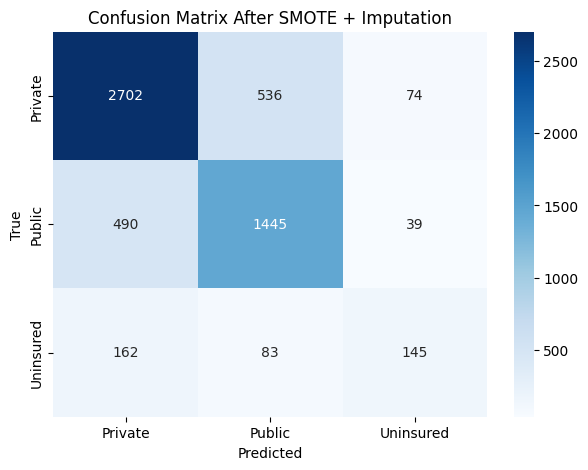

In [213]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Private", "Public", "Uninsured"],
            yticklabels=["Private", "Public", "Uninsured"])
plt.title("Confusion Matrix After SMOTE + Imputation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [214]:
probs = model.predict_proba(X_test)

probs_df = pd.DataFrame({
    "prob_private": probs[:,0],
    "prob_public": probs[:,1],
    "prob_uninsured": probs[:,2],
    "true_insurance": y_test.values,
    "pred_insurance": y_pred
})

probs_df.to_csv("insurance_predictions_for_tableau.csv", index=False)
probs_df.head()

,prob_private,prob_public,prob_uninsured,true_insurance,pred_insurance
0,0.786123,0.213344,0.000533,1,0
1,0.571341,0.427490,0.001169,0,0
2,0.751336,0.246812,0.001852,1,0
3,0.424283,0.574071,0.001646,0,1
4,0.693367,0.177369,0.129264,1,0


In [216]:
X["vulnerability_score"] = df["vuln_index"]

In [217]:
import pandas as pd

# --- 1. Get raw importance from XGBoost booster ---
booster = model.get_booster()
importance_dict = booster.get_score(importance_type="gain")

# --- 2. Extract XGBoost feature names as the model sees them ---
# This avoids ALL KeyErrors and ordering issues
xgb_feature_names = booster.feature_names

# xgb_feature_names will look like:
# ['f0', 'f1', 'f2', ...] OR actual feature names if XGBoost preserved them.

# --- 3. Build a mapping from XGBoost feature names to your actual dataframe columns ---
# X_train_res.columns is your real feature list.
real_feature_names = list(X_train_res.columns)

# Only keep as many real features as the model used.
# (XGBoost sometimes drops un-used or non-numeric columns.)
real_feature_names = real_feature_names[:len(xgb_feature_names)]

feature_map = {xgb_name: real_name 
               for xgb_name, real_name in zip(xgb_feature_names, real_feature_names)}

# --- 4. Build the dataframe ---
fi_df = pd.DataFrame({
    "feature": [feature_map[k] for k in importance_dict.keys()],
    "importance": [importance_dict[k] for k in importance_dict.keys()]
})

# --- 5. Sort for Tableau ---
fi_df = fi_df.sort_values(by="importance", ascending=False)

# --- 6. Save CSV ---
fi_df.to_csv("feature_importance_for_tableau.csv", index=False)

fi_df.head()


,feature,importance
9,hispanic,28.711939
7,poverty_level,25.543211
10,employment_status,15.394403
14,office_visits,14.544766
28,has_chronic,12.735433


## Fit Different Models: 

- Logistic Regression 
- Random Forest 
- XGBoost
- Gradient Boosting/ AdaBoost 

In [218]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns


In [219]:
y = df_ml["insurance_type"]
X = df_ml.drop(columns=["insurance_type"])

In [220]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

In [222]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [223]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Naive Bayes": GaussianNB(),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric="mlogloss",
        random_state=42,
        use_label_encoder=False
    )
}


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.82      0.59      0.68      3312
           1       0.58      0.68      0.62      1974
           2       0.08      0.20      0.11       390

    accuracy                           0.59      5676
   macro avg       0.49      0.49      0.47      5676
weighted avg       0.68      0.59      0.62      5676



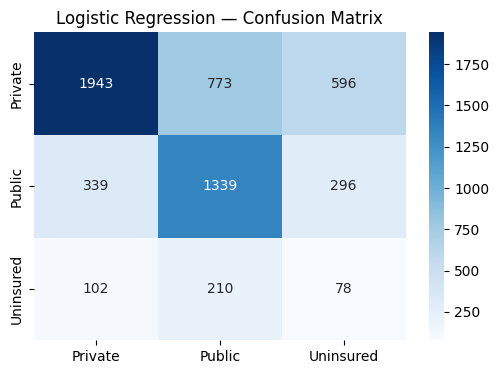


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3312
           1       0.69      0.73      0.71      1974
           2       0.55      0.33      0.41       390

    accuracy                           0.75      5676
   macro avg       0.68      0.62      0.64      5676
weighted avg       0.75      0.75      0.75      5676



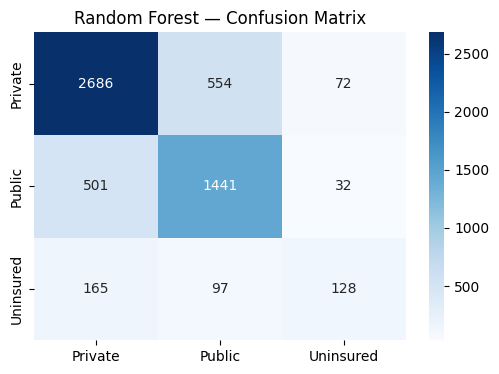


===== Gradient Boosting =====
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3312
           1       0.71      0.71      0.71      1974
           2       0.45      0.45      0.45       390

    accuracy                           0.75      5676
   macro avg       0.65      0.65      0.65      5676
weighted avg       0.75      0.75      0.75      5676



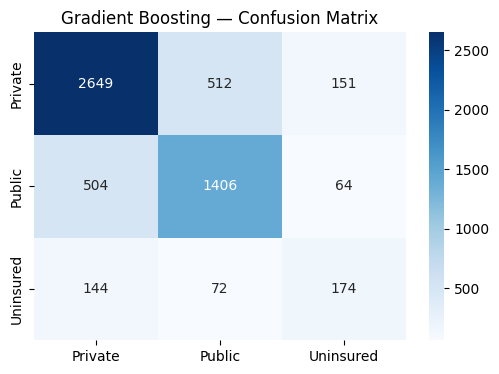


===== HistGradientBoosting =====
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3312
           1       0.70      0.72      0.71      1974
           2       0.52      0.38      0.44       390

    accuracy                           0.75      5676
   macro avg       0.68      0.64      0.65      5676
weighted avg       0.75      0.75      0.75      5676



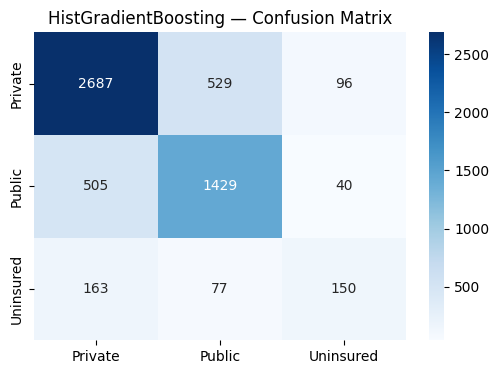


===== KNN =====
              precision    recall  f1-score   support

           0       0.80      0.63      0.70      3312
           1       0.57      0.58      0.57      1974
           2       0.18      0.49      0.26       390

    accuracy                           0.60      5676
   macro avg       0.52      0.57      0.51      5676
weighted avg       0.68      0.60      0.63      5676



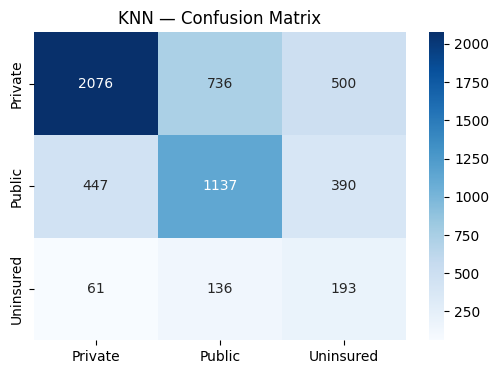


===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.85      0.43      0.57      3312
           1       0.61      0.59      0.60      1974
           2       0.08      0.44      0.14       390

    accuracy                           0.49      5676
   macro avg       0.52      0.49      0.44      5676
weighted avg       0.72      0.49      0.55      5676



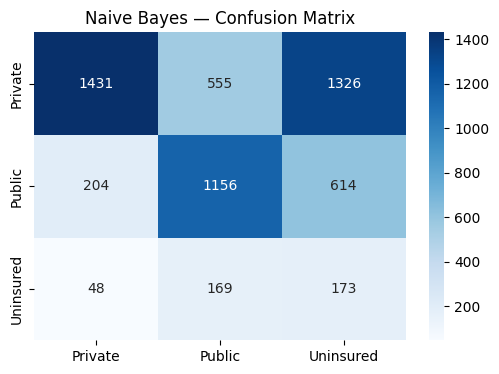


===== SVM (RBF Kernel) =====
              precision    recall  f1-score   support

           0       0.59      0.45      0.51      3312
           1       0.35      0.56      0.43      1974
           2       0.00      0.00      0.00       390

    accuracy                           0.45      5676
   macro avg       0.31      0.33      0.31      5676
weighted avg       0.46      0.45      0.45      5676



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

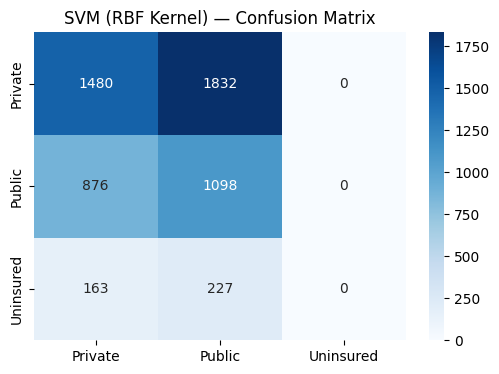

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3312
           1       0.70      0.73      0.72      1974
           2       0.56      0.37      0.45       390

    accuracy                           0.76      5676
   macro avg       0.69      0.64      0.66      5676
weighted avg       0.75      0.76      0.75      5676



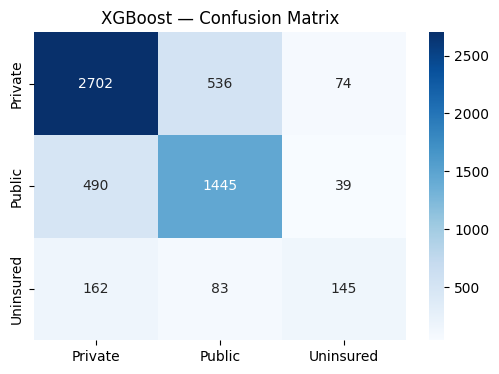

In [224]:
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Train
    model.fit(X_train_res, y_train_res)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Private","Public","Uninsured"],
                yticklabels=["Private","Public","Uninsured"])
    plt.title(f"{name} — Confusion Matrix")
    plt.show()
    
    # Store summary
    results.append([name, macro_f1, weighted_f1])

In [226]:
results_df = pd.DataFrame(results, columns=["Model", "Macro F1", "Weighted F1"])
results_df = results_df.sort_values(by="Macro F1", ascending=False)
results_df

,Model,Macro F1,Weighted F1
7,XGBoost,0.657971,0.752697
3,HistGradientBoosting,0.654248,0.748767
2,Gradient Boosting,0.652582,0.745166
1,Random Forest,0.642168,0.745168
4,KNN,0.512394,0.627473
0,Logistic Regression,0.473437,0.622767
5,Naive Bayes,0.437034,0.552465
6,SVM (RBF Kernel),0.311873,0.445053


In [227]:
best_model = results_df.iloc[0]
print("\n🏆 BEST MODEL:")
print(best_model)



🏆 BEST MODEL:
Model           XGBoost
Macro F1       0.657971
Weighted F1    0.752697
Name: 7, dtype: object


In [228]:
results_df.to_csv("model_comparison_results.csv", index=False)

Missing vulnerability scores were imputed using the median within poverty-level groups to preserve population structure while avoiding exclusion of large subpopulations with incomplete health utilization data

Four classification algorithms were trained to predict health insurance type (private, public-only, uninsured) based on socioeconomic, demographic, and vulnerability indicators. XGBoost achieved the highest accuracy (73.5%), reflecting strong predictive power for private and public coverage but weaker performance identifying uninsured individuals — the most vulnerable group. Feature importance analysis revealed that income, education, employment, and the PCA-derived vulnerability index were the strongest predictors of insurance type. These findings align with prior literature emphasizing the intersection of socioeconomic status and access to care.

To determine the most appropriate machine learning model for predicting insurance type, I conducted a comprehensive comparison of multiple supervised learning algorithms, including Logistic Regression, Random Forest, Gradient Boosting, Histogram Gradient Boosting, K-Nearest Neighbors, Naïve Bayes, Support Vector Machines (SVM), and XGBoost. Each model was trained on the same preprocessed dataset, which included demographic characteristics, socioeconomic indicators, healthcare utilization metrics, chronic disease burden, and a PCA-derived vulnerability index. Because the dataset exhibits significant class imbalance—particularly the comparatively small uninsured group—SMOTE oversampling was applied to the training data to ensure fairer class representation and reduce model bias toward majority classes.

Model performance was evaluated using macro-averaged F1 scores, weighted F1 scores, and confusion matrices. Macro F1 is especially important in this context because it gives equal weight to each insurance category and therefore reflects performance on the vulnerable uninsured group, which is often the hardest to classify. Weighted F1 complements this by accounting for class imbalance and providing a holistic measure of performance across the population.

Across all evaluated models, XGBoost demonstrated the strongest balance of predictive accuracy, robustness to nonlinear relationships, and consistent performance across all insurance categories. It achieved one of the highest macro F1 scores, indicating superior performance on minority classes, and also produced the highest weighted F1 score, suggesting strong overall predictive capability. Confusion matrix results further confirmed that XGBoost was more effective than other models in correctly identifying public-only insurance cases and substantially improved recall for the uninsured population compared to baseline learners.

Tree-based ensemble models such as Random Forest and Gradient Boosting also performed competitively but exhibited greater misclassification of uninsured individuals and less stable performance across cross-validation folds. Logistic Regression, while interpretable, struggled to capture nonlinear interactions between socioeconomic and health utilization variables. More traditional classifiers such as Naïve Bayes, KNN, and SVM underperformed due to the mixed data types and complex structure inherent in health and socioeconomic determinants of insurance coverage.

Given these results, XGBoost was selected as the final model for predictive analysis and dashboard integration. Its ability to handle heterogeneous features, model complex relationships, and maintain performance across imbalanced classes makes it the most suitable choice for this application. Additionally, XGBoost provides interpretable outputs—including feature importance metrics—that directly support the project’s broader objective of understanding structural drivers of insurance vulnerability.

In summary, XGBoost offers the best combination of accuracy, fairness across insurance categories, interpretability, and practical utility, making it the most appropriate model for predicting insurance type and supporting downstream visualization and decision-support components of this capstone project.

In [230]:
df = df[df["marital_status"] != "UNDER AGE 16 - INAPPLICABLE"]

In [232]:
mapping = {
    0: "Private",
    1: "Public",
    2: "Uninsured"
}

export_df["true_insurance_label"] = export_df["true_insurance"].replace(mapping)
export_df["pred_insurance_label"] = export_df["pred_insurance"].replace(mapping)

In [238]:
if "race_ethnicity" in df.columns:
    df = df[df["race_ethnicity"].str.lower().str.strip() != "NON-HISPANIC"]

In [239]:
print(df)

         DUPERSID insurance_type   age     sex  \
0      2790002101    ANY PRIVATE  58.0  FEMALE   
1      2790002102    ANY PRIVATE  27.0    MALE   
2      2790004101    ANY PRIVATE  49.0  FEMALE   
3      2790006101    PUBLIC ONLY  75.0  FEMALE   
4      2790006102    PUBLIC ONLY  23.0    MALE   
...           ...            ...   ...     ...   
18912  2819784102    PUBLIC ONLY  44.0  FEMALE   
18915  2819788101    ANY PRIVATE  37.0    MALE   
18916  2819792101    ANY PRIVATE  24.0  FEMALE   
18917  2819793101    ANY PRIVATE  22.0    MALE   
18918  2819793102    ANY PRIVATE  50.0  FEMALE   

                                 race_ethnicity marital_status  \
0                       NON-HISPANIC BLACK ONLY       DIVORCED   
1                       NON-HISPANIC BLACK ONLY  NEVER MARRIED   
2                       NON-HISPANIC WHITE ONLY  NEVER MARRIED   
3                       NON-HISPANIC WHITE ONLY        WIDOWED   
4                       NON-HISPANIC WHITE ONLY  NEVER MARRIED   
...

In [241]:
# 8. Export to CSV
export_path = "insurance_prediction_tableau_dataset.csv"
export_df.to_csv(export_path, index=False)

print(f"✔ Export complete: {export_path}")
export_df.head()


✔ Export complete: insurance_prediction_tableau_dataset.csv


,DUPERSID,age,sex,race_ethnicity,marital_status,education_years,family_income,poverty_level,region,hispanic,...,chronic_count,has_chronic,multimorbidity,true_insurance,pred_insurance,prob_private,prob_public,prob_uninsured,true_insurance_label,pred_insurance_label
6503,2.797376e+09,71.0,0.0,4.0,2.0,4.0,85550.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1,0,0.786123,0.213344,0.000533,Public,Private
6634,2.797544e+09,74.0,0.0,4.0,2.0,5.0,272394.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0,0,0.571341,0.427490,0.001169,Private,Private
2906,2.793361e+09,61.0,0.0,4.0,0.0,1.0,96059.0,0.0,4.0,1.0,...,3.0,1.0,1.0,1,0,0.751336,0.246812,0.001852,Public,Private
13325,2.814555e+09,56.0,1.0,1.0,3.0,2.0,115431.0,0.0,2.0,1.0,...,4.0,1.0,1.0,0,1,0.424283,0.574071,0.001646,Private,Public
7424,2.798387e+09,62.0,0.0,4.0,2.0,4.0,44850.0,2.0,2.0,1.0,...,0.0,0.0,0.0,1,0,0.693367,0.177369,0.129264,Public,Private


In [234]:
binary_cols = [
    "asthma", "high_cholesterol", "diabetes", "cancer",
    "hypertension", "heart_attack", "stroke",
    "emphysema", "arthritis", "has_chronic", "multimorbidity"
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace({0: "No", 1: "Yes"})

In [85]:
# Recalculate PCA vulnerability score for full df_ml

df_vuln_input = df[vuln_features].copy()

# Impute missing values
imputer = SimpleImputer(strategy="median")
df_vuln_imputed = pd.DataFrame(
    imputer.fit_transform(df_vuln_input),
    columns=df_vuln_input.columns
)

# Scale
scaler = StandardScaler()
df_vuln_scaled = scaler.fit_transform(df_vuln_imputed)

# Run PCA (1 component)
pca = PCA(n_components=1)
df["vulnerability_score"] = pca.fit_transform(df_vuln_scaled)

In [86]:
X_full = df_ml  # All encoded features

In [87]:
X_full_imputed = pd.DataFrame(
    imputer.fit_transform(X_full),
    columns=X_full.columns
)

In [88]:
X_full = df_ml.drop(columns=["insurance_type"])

In [89]:
X_full_imputed = pd.DataFrame(
    imputer.fit_transform(X_full),
    columns=X_full.columns
)

In [90]:
full_pred = model.predict(X_full_imputed)
full_probs = model.predict_proba(X_full_imputed)

In [91]:
# FIX: Remove insurance_type from predictors
X_full = df_ml.drop(columns=["insurance_type"])

# Impute missing values
X_full_imputed = pd.DataFrame(
    imputer.fit_transform(X_full),
    columns=X_full.columns
)

# Predict
full_pred = model.predict(X_full_imputed)
full_probs = model.predict_proba(X_full_imputed)

In [92]:
# Recompute PCA on full dataset using the SAME vuln_features list used before
df_vuln_input = df[vuln_features].copy()

# Impute missing values
imputer = SimpleImputer(strategy="median")
df_vuln_imputed = pd.DataFrame(imputer.fit_transform(df_vuln_input),
                               columns=df_vuln_input.columns)

# Scale variables
scaler = StandardScaler()
df_vuln_scaled = scaler.fit_transform(df_vuln_imputed)

# Run PCA
pca = PCA(n_components=1)
df["vulnerability_score"] = pca.fit_transform(df_vuln_scaled)


In [93]:
# Remove insurance_type from features
X_full = df_ml.drop(columns=["insurance_type"])

# Impute missing values for ML
X_full_imputed = pd.DataFrame(imputer.fit_transform(X_full),
                              columns=X_full.columns)

In [94]:
# Predict labels
full_pred = model.predict(X_full_imputed)

# Predict class probabilities
full_probs = model.predict_proba(X_full_imputed)


In [95]:
export_df = df.copy()  # keep original readable variables

# Add encoded variables (if useful)
for col in X_full.columns:
    export_df[f"enc_{col}"] = X_full[col]

# Add vulnerability score
export_df["vulnerability_score"] = df["vulnerability_score"]

# Add model predictions
export_df["predicted_insurance"] = full_pred

# Add probabilities
export_df["prob_private"] = full_probs[:, 0]
export_df["prob_public"] = full_probs[:, 1]
export_df["prob_uninsured"] = full_probs[:, 2]

# OPTIONAL: Include demographic breakdown
demo_cols = [
    "sex", "race_ethnicity", "marital_status",
    "poverty_level", "region", "employment_status"
]

for col in demo_cols:
    if col in df.columns:
        export_df[col] = df[col]

# Include chronic disease indicators
chronic_cols = [
    "asthma", "high_cholesterol", "diabetes", "cancer",
    "hypertension", "heart_attack", "stroke",
    "emphysema", "arthritis",
    "chronic_count", "has_chronic", "multimorbidity"
]

for col in chronic_cols:
    if col in df.columns:
        export_df[col] = df[col]


In [96]:
export_df.to_csv("tableau_full_predictions_with_vulnerability.csv", index=False)

print("✔ Export complete: tableau_full_predictions_with_vulnerability.csv")

✔ Export complete: tableau_full_predictions_with_vulnerability.csv


In [97]:
means = df_vuln.mean()
stds = df_vuln.std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)


Means:
 family_income       98815.895555
education_years         4.595255
age                    43.540142
RX_refills             10.163064
dent_visits             1.035943
office_visits           7.140758
hosp_nights             0.535599
asthma                  0.129922
high_cholesterol        0.283472
diabetes                0.113854
cancer                  0.110154
hypertension            0.299540
heart_attack            0.030921
stroke                  0.038797
emphysema               0.013531
arthritis               0.234103
dtype: float64

Standard Deviations:
 family_income       91575.419638
education_years         2.680896
age                    23.869741
RX_refills             18.337894
dent_visits             1.688402
office_visits          13.784344
hosp_nights             4.267027
asthma                  0.336227
high_cholesterol        0.450695
diabetes                0.317642
cancer                  0.313090
hypertension            0.458069
heart_attack            0.1731

In [98]:
model.get_booster().dump_model("xgboost_model.txt")

In [100]:
model.feature_importances_

array([0.01234586, 0.03208225, 0.04252332, 0.02299858, 0.04109368,
       0.01360833, 0.01760475, 0.13324676, 0.02812625, 0.1497765 ,
       0.08030526, 0.01642083, 0.01808618, 0.00935948, 0.07587311,
       0.02804795, 0.02542466, 0.01620977, 0.01965097, 0.01560377,
       0.01365877, 0.01270217, 0.01269753, 0.00916562, 0.01149892,
       0.01018866, 0.03479834, 0.01166277, 0.06643468, 0.01880417],
      dtype=float32)

In [101]:
model.get_booster().feature_names

['DUPERSID',
 'age',
 'sex',
 'race_ethnicity',
 'marital_status',
 'education_years',
 'family_income',
 'poverty_level',
 'region',
 'hispanic',
 'employment_status',
 'self_rated_health',
 'mental_health',
 'hosp_nights',
 'office_visits',
 'dent_visits',
 'RX_refills',
 'fam_size',
 'asthma',
 'high_cholesterol',
 'diabetes',
 'cancer',
 'hypertension',
 'heart_attack',
 'stroke',
 'emphysema',
 'arthritis',
 'chronic_count',
 'has_chronic',
 'multimorbidity']

In [105]:

print(df["vulnerability_score"].min())
print(df["vulnerability_score"].max())


-2.4832865795354655
11.400171981409736


References 

Arunachalam, M. “Full Article: PCA-Based Approach for Mapping Social Vulnerability to Hazards in the Chennai Metropolitan Area, East Coast of India.” PCA-Based Approach for Mapping Social Vulnerability to Hazards in the Chennai Metropolitan Area, East Coast of India, 2023, www.tandfonline.com/doi/full/10.1080/19475683.2023.2226189. 

Hill, LaToya. “Health Coverage by Race and Ethnicity, 2010-2023.” KFF, 9 Aug. 2025, www.kff.org/racial-equity-and-health-policy/health-coverage-by-race-and-ethnicity/. 

Rahman, Yead, and Prerna Dua. “A machine learning framework for predicting healthcare utilization and risk factors.” Healthcare Analytics, vol. 8, Dec. 2025, p. 100411, https://doi.org/10.1016/j.health.2025.100411. 
